In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [195]:
def search(x, y):
    factor = 0.1
    center = (5, 5)
    return np.exp(factor * (-np.square(x - center[0]) - np.square(y - center[1])))

def value(x, y, z):
    factor = 0.1
    center = (0, 5, 5)
    return np.exp(factor * (-np.square(x - center[0]) - np.square(y - center[1]) - np.square(z - center[2])))

def threat(x, y, z):
    factor = 1
    center = (0, 5, 0)
    return np.exp(factor * (-np.square(x - center[0]) - np.square(y - center[1]) - np.square(z - center[2])))




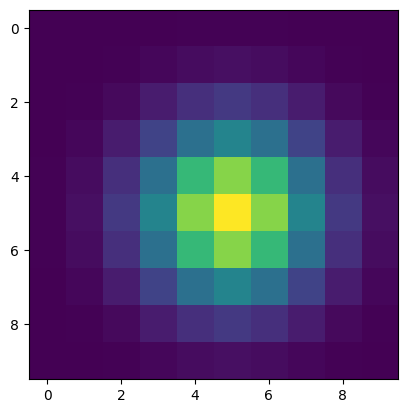

In [10]:
grid = (np.meshgrid(np.arange(10), np.arange(10)))
plt.imshow(search(grid[0], grid[1]))

In [12]:
!pip install cvxpy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 1.9 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 KB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 6.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.8 MB/s eta 0:00:00a 0:00:01


In [13]:
import cvxpy as cp

In [14]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


In [15]:
print(result)

19.83126370644502


In [16]:
num_waypoints = 10

waypoints = cp.Variable((num_waypoints, 3))


In [17]:
print(waypoints)

var45


In [18]:
waypoints = [[] for i in range(num_waypoints)]
for i in range(num_waypoints):
    waypoints[i].append(cp.Variable())
    waypoints[i].append(cp.Variable())
    waypoints[i].append(cp.Variable())


In [20]:
def obj(waypoints):
    tot = 0
    for w in waypoints:
        tot += value(w[0], w[1], w[2])
    return tot

In [21]:

objective = cp.Maximize(obj)
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

TypeError: float() argument must be a string or a real number, not 'function'

In [102]:
from scipy.optimize import minimize

In [228]:
grid = np.meshgrid(np.arange(10), np.arange(10))
search_grid = search(grid[0], grid[1])

def objective(waypoints):
    tot = 0
    for i in range(0, len(waypoints), 3):
        tot += -search_grid[int(min(np.round(waypoints[0]), 9)), int(min(np.round(waypoints[1]), 9))]
    return tot

In [236]:
objective(waypoints)

0.0

In [239]:
def my_round(pt):
    return [int(min(np.round(pt[0], 9))), int(min(np.round(pt[1]), 9))]

In [241]:
print(waypoints)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [242]:
my_round(waypoints[0:2])

TypeError: 'numpy.int64' object is not iterable

In [237]:
search_grid[int(min(np.round(waypoints[0]), 9)), int(min(np.round(waypoints[1]), 9))]

0.0

In [238]:
print(search_grid)

[[0.00673795 0.01657268 0.03337327 0.05502322 0.07427358 0.082085
  0.07427358 0.05502322 0.03337327 0.01657268]
 [0.         0.0407622  0.082085   0.13533528 0.18268352 0.20189652
  0.18268352 0.13533528 0.082085   0.0407622 ]
 [0.03337327 0.082085   0.16529889 0.27253179 0.36787944 0.40656966
  0.36787944 0.27253179 0.16529889 0.082085  ]
 [0.05502322 0.13533528 0.27253179 0.44932896 0.60653066 0.67032005
  0.60653066 0.44932896 0.27253179 0.13533528]
 [0.07427358 0.18268352 0.36787944 0.60653066 0.81873075 0.90483742
  0.81873075 0.60653066 0.36787944 0.18268352]
 [0.082085   0.20189652 0.40656966 0.67032005 0.90483742 1.
  0.90483742 0.67032005 0.40656966 0.20189652]
 [0.07427358 0.18268352 0.36787944 0.60653066 0.81873075 0.90483742
  0.81873075 0.60653066 0.36787944 0.18268352]
 [0.05502322 0.13533528 0.27253179 0.44932896 0.60653066 0.67032005
  0.60653066 0.44932896 0.27253179 0.13533528]
 [0.03337327 0.082085   0.16529889 0.27253179 0.36787944 0.40656966
  0.36787944 0.2725317

In [223]:
# def eq_const(waypoints, i):
#     def eq(waypoints):
#         x = waypoints[i]
#         y = waypoints[i+1]
#         z = waypoints[i+2]
#         x2 = waypoints[i+3]
#         y2 = waypoints[i+4]
#         z2 = waypoints[i+5]
        
#         return np.sqrt(np.square(x2-x) + np.square(y2-y) + np.square(z2-z))-1
def get_eq_const(max_dist):

    def eq_const(waypoints, d=max_dist):
        tot = 0
        
        for v in range(0, len(waypoints)-5, 3):
            i=v
            x = waypoints[i]
            y = waypoints[i+1]
            z = waypoints[i+2]
            x2 = waypoints[i+3]
            y2 = waypoints[i+4]
            z2 = waypoints[i+5]

            dist = np.sqrt(np.square(x2-x) + np.square(y2-y) + np.square(z2-z))
            tot += dist
        
        return d - tot

    return {'type': 'ineq', 'fun': eq_const}




def equality_constraints(waypoints):
    all_constraints = []
    tot_dist = 0
    for v in range(0, len(waypoints)-5, 3):
        
        def eq_const(waypoints, i=v):
            x = waypoints[i]
            y = waypoints[i+1]
            z = waypoints[i+2]
            x2 = waypoints[i+3]
            y2 = waypoints[i+4]
            z2 = waypoints[i+5]

            # print(i)
            
            return np.sqrt(np.square(x2-x) + np.square(y2-y) + np.square(z2-z))-2

        all_constraints.append({'type': 'eq', 'fun': eq_const})

    return all_constraints

def init_constraints(waypoints, pos):
    consts = []
    for i in range(3):
        def init_const(waypoints, v=i, p = pos + [0]):
            # print(v)
            return waypoints[v] - p[v]
        consts.append({'type': 'eq', 'fun': init_const})
    return consts
    # return {'type': 'eq', 'fun': }

def final_constraints(waypoints):
    consts = []
    for i in range(3):
        def init_const(waypoints, v=i):
            # print(v)
            return waypoints[len(waypoints) - 3 + v]
        consts.append({'type': 'eq', 'fun': init_const})
    return consts

In [116]:
print(objective(waypoints))

1.8068296047903733e-21


In [117]:
print(waypoints)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
waypoints = [0 for i in range(3*num_waypoints)]

In [47]:
print(objective(waypoints))

-1.9287498479639177e-21


In [114]:
waypoints[0] = 1

In [121]:
print(cs[0]['fun'](waypoints))

0
1


In [216]:
dist_const = [get_eq_const(15)]
cs = init_constraints(waypoints)
fs = final_constraints(waypoints)
consts = dist_const + cs + fs

In [206]:
print(len(consts))

7


In [93]:
print(consts[0]['fun'](waypoints))

0
-1.0


In [217]:
pt = waypoints.copy()
# perform the l-bfgs-b algorithm search
result = minimize(objective, pt,  constraints=consts)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully
Total Evaluations: 690
Solution: f([ 0.          0.          0.          4.99851905  4.99848975 -0.04593028
  5.00105482  5.00123455 -0.3130246   4.99795693  4.9976912  -0.30254241
  4.99970253  4.99996697 -0.29469726  4.99975094  4.99949421 -0.21913716
  4.99919433  4.99936232 -0.32285571  4.9999979   4.9999473  -0.31874425
  4.99850125  4.99852876  0.05880927  0.          0.          0.        ]) = -8.01347


In [218]:
xs = []
ys = []
zs = []
for i in range(0, len(solution)-2, 3):
    xs.append(solution[i])
    ys.append(solution[i+1])
    zs.append(solution[i+2])


In [193]:
print(zs)

[2.2708065911117268e-20, 1.4140342446149736, 2.8279418886422745, 4.232990254629567, 5.307206235409592, 5.3071598439442385, 4.232977340502531, 2.8279421218348406, 1.4140347720269157, 5.679068268306834e-20]


In [171]:
print(xs)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [234]:
print(search_grid)

[[0.00673795 0.01657268 0.03337327 0.05502322 0.07427358 0.082085
  0.07427358 0.05502322 0.03337327 0.01657268]
 [0.         0.0407622  0.082085   0.13533528 0.18268352 0.20189652
  0.18268352 0.13533528 0.082085   0.0407622 ]
 [0.03337327 0.082085   0.16529889 0.27253179 0.36787944 0.40656966
  0.36787944 0.27253179 0.16529889 0.082085  ]
 [0.05502322 0.13533528 0.27253179 0.44932896 0.60653066 0.67032005
  0.60653066 0.44932896 0.27253179 0.13533528]
 [0.07427358 0.18268352 0.36787944 0.60653066 0.81873075 0.90483742
  0.81873075 0.60653066 0.36787944 0.18268352]
 [0.082085   0.20189652 0.40656966 0.67032005 0.90483742 1.
  0.90483742 0.67032005 0.40656966 0.20189652]
 [0.07427358 0.18268352 0.36787944 0.60653066 0.81873075 0.90483742
  0.81873075 0.60653066 0.36787944 0.18268352]
 [0.05502322 0.13533528 0.27253179 0.44932896 0.60653066 0.67032005
  0.60653066 0.44932896 0.27253179 0.13533528]
 [0.03337327 0.082085   0.16529889 0.27253179 0.36787944 0.40656966
  0.36787944 0.2725317

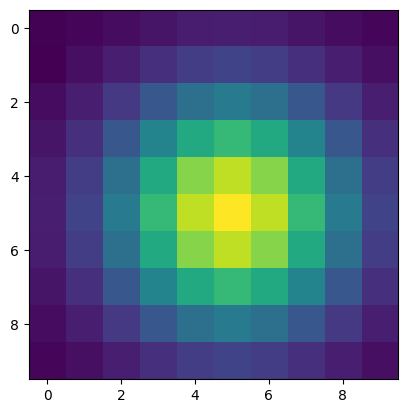

In [235]:
plt.imshow(search_grid)

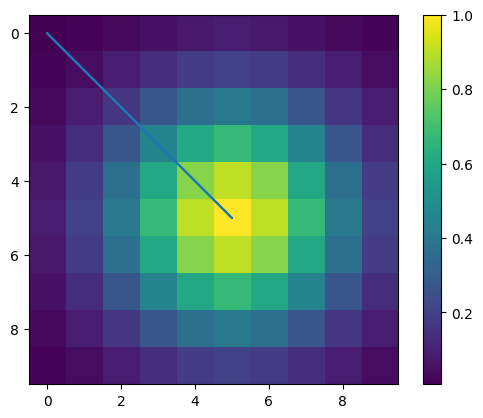

In [219]:
n=10
grid = (np.meshgrid(np.arange(n), np.arange(n)))
values = search(grid[0], grid[1])
plt.imshow(values)

plt.plot(xs, ys)
plt.colorbar()

In [233]:
t = 0
xs = []
ys = []
zs = []
horizon = 10
exec = 5
max_dist = 15
pos = [0, 0]

while max_dist > 0:
    print(max_dist)
    init_vals = [0] * 3 * horizon

    dist_const = [get_eq_const(max_dist)]
    cs = init_constraints(waypoints, pos)
    fs = final_constraints(waypoints)
    consts = dist_const + cs + fs

    result = minimize(objective, pt, constraints=consts)
    solution = result['x']
    print(solution)

    curr_xs = []
    curr_ys = []
    for i in range(0, exec*3, 3):
        curr_xs.append(solution[i])
        curr_ys.append(solution[i+1])
        search_grid[int(min(np.round(waypoints[0]), 9)), int(min(np.round(waypoints[1]), 9))] = 0
    print(curr_xs, curr_ys)
    d = 0
    for i in range(len(curr_xs) - 1):
        d += np.sqrt(np.square(curr_xs[i+1] - curr_xs[i]) + np.square(curr_ys[i+1] - curr_ys[i]))
    print(d)
    max_dist -= d

    pos = [curr_xs[-1], curr_ys[-1]]
    




15
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0]
0.0
15.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


KeyboardInterrupt: 

In [ ]:
n=10
grid = (np.meshgrid(np.arange(n), np.arange(n)))
values = search(grid[0], grid[1])
plt.imshow(values)

plt.plot(xs, ys)
plt.colorbar()

In [162]:
for const in consts:
    print(const['fun'](solution))

6.91403457770944
3.5612186947142632e-06
0.007276792586675185
1.7466949335132043e-05
0.011781308642476396
5.6896472533374265e-09
0.00014867480307995118
7.892812814991323e-07
6.921649858935867
0.0
0.0
0.0
0.0
0.0
0.0


In [136]:
print(solution)

[ 0.          0.          0.         -1.28908376  0.50535412  0.50535412
  0.54425486  0.51855639  0.51855639 -0.05022772 -0.05022772 -0.05022772
  0.52712254  0.52712254  0.52712254 -0.05022772 -0.05022772 -0.05022772
  0.52712254  0.52712254  0.52712254 -0.05022772 -0.05022772 -0.05022772
  0.57735027  0.57735027  0.57735027  0.          0.          0.        ]


In [137]:
print(objective(solution))

-1.6905414936563433e-17


In [43]:
print(pt)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
